***Pre-processing***

**1.) Importing required libraries and loading the dataset**

In [61]:
# Importing the required modules
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import StandardScaler
# Modules to visualise the data
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 


In [62]:
# Loading the dataset as a pandas dataframe
data=pd.read_csv(r"C:\Users\Devab\OneDrive\Desktop\Coding\ACM\S2 Recruitment\TASK-01\data.csv")

**2.) Exploring the data**

In [63]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [65]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

Plotting the correlation matrix to understand the relationship between the numerical features and the target variable

Least correlated feature to median_house_value: latitude


<Axes: >

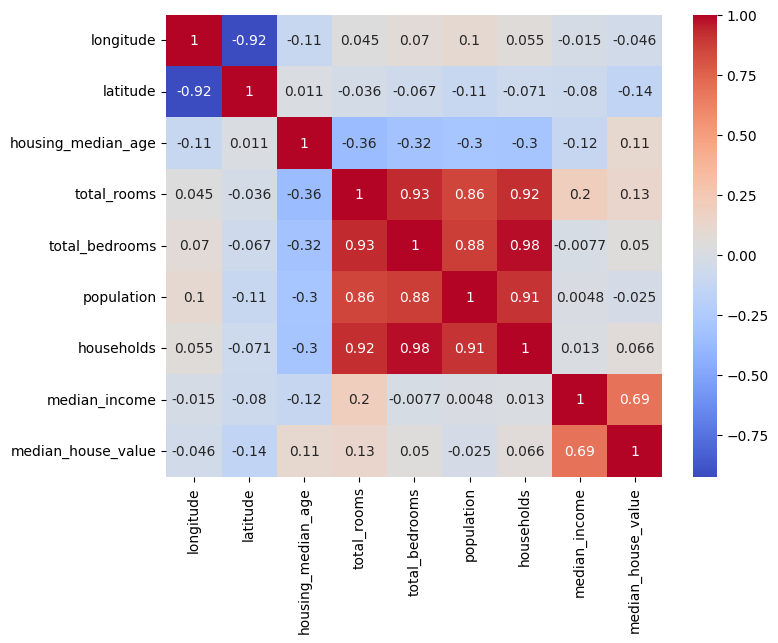

In [66]:
numerical_data=data.select_dtypes(include=[np.number]) # selecting all the numerical columns present in the dataset
corr_matrix=numerical_data.corr()

# Visualising the correlation matrix using a heatmap
plt.figure(figsize=(8,6))
# Analyzing the heatmap to find the least and most correlated features to median_house_value
least_correlated = corr_matrix['median_house_value'].idxmin()
most_correlated = corr_matrix['median_house_value'].idxmax()

print(f"Least correlated feature to median_house_value: {least_correlated}")
sns.heatmap(corr_matrix,annot=True,cmap="coolwarm")

Checking for outliers in the data

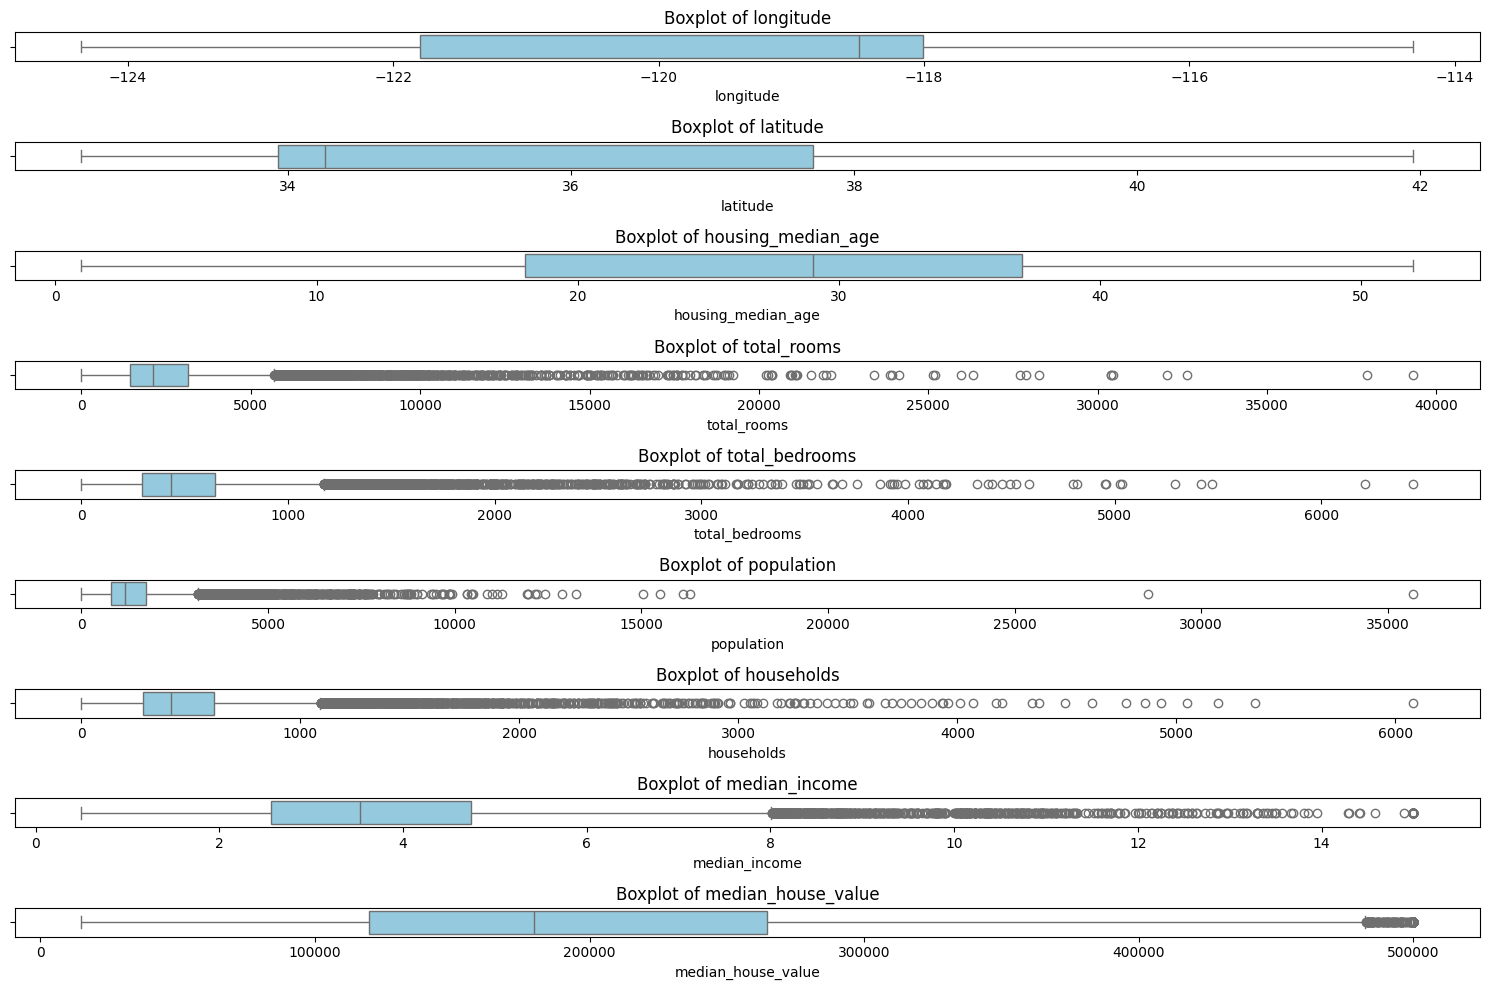

In [67]:

numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 1, i)  # Arrange subplots in a single column
    sns.boxplot(x=data[col], color='skyblue')
    plt.title(f'Boxplot of {col}')    
plt.tight_layout()  # Adjust layout to avoid overlapping
plt.show()

# The dots outside the bluish box represent the outliers in the data.

**OBSERVATIONS**

-> This dataset contains 207 null values ( present in total_bedrooms column)

-> One column containing categorical variables is present (ocean_proximity column)

-> Latitude,Longitude and population are the least co-related features to the target variable

-> The columns total_rooms , total_bedrooms_mode, population , households , median_income and median_house_value contain many outliers

**3.) Cleaning and pre-processing the data** 

Imputing the null vallues present in total_bedrooms with mode

In [68]:
data['total_bedrooms_mode'] = data['total_bedrooms'].fillna(data['total_bedrooms'].mean())
data.drop(columns="total_bedrooms",inplace=True)
data.isnull().sum()

longitude              0
latitude               0
housing_median_age     0
total_rooms            0
population             0
households             0
median_income          0
ocean_proximity        0
median_house_value     0
total_bedrooms_mode    0
dtype: int64

Encoding the column containing the categorical variable (ocean_proximity)

In [69]:
# One-hot encoding the categorical variable
data_encoded = pd.get_dummies(data, columns=['ocean_proximity'], drop_first=True)
data_encoded.head()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,total_bedrooms_mode,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41,880,322,126,8.3252,452600,129.0,False,False,True,False
1,-122.22,37.86,21,7099,2401,1138,8.3014,358500,1106.0,False,False,True,False
2,-122.24,37.85,52,1467,496,177,7.2574,352100,190.0,False,False,True,False
3,-122.25,37.85,52,1274,558,219,5.6431,341300,235.0,False,False,True,False
4,-122.25,37.85,52,1627,565,259,3.8462,342200,280.0,False,False,True,False


**Observation** 

-> Longitude , latitude and population  are the least co-related columns to the target variable

Dropping the least co-related features

In [70]:
data_encoded.drop(columns=["latitude","population"],inplace=True)

Taking care of the outliers 

-> The columns total_rooms , total_bedrooms_mode , households , median_income and median_house_value contain many outliers

In [71]:
# Calculating the iqr for each column

outliers=['total_rooms','total_bedrooms_mode','households','median_income']
for col in outliers:
    Q1 = data_encoded[col].quantile(0.25)
    Q3 = data_encoded[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filtering out the outliers
    data_encoded[col] = data_encoded[col].apply(lambda x: np.sqrt(x) if x > upper_bound or x < lower_bound else x)



**Observation** 

-> The number of outliers reduces drastically when the above code cell containing the code to transform the outlier data is run multiple times

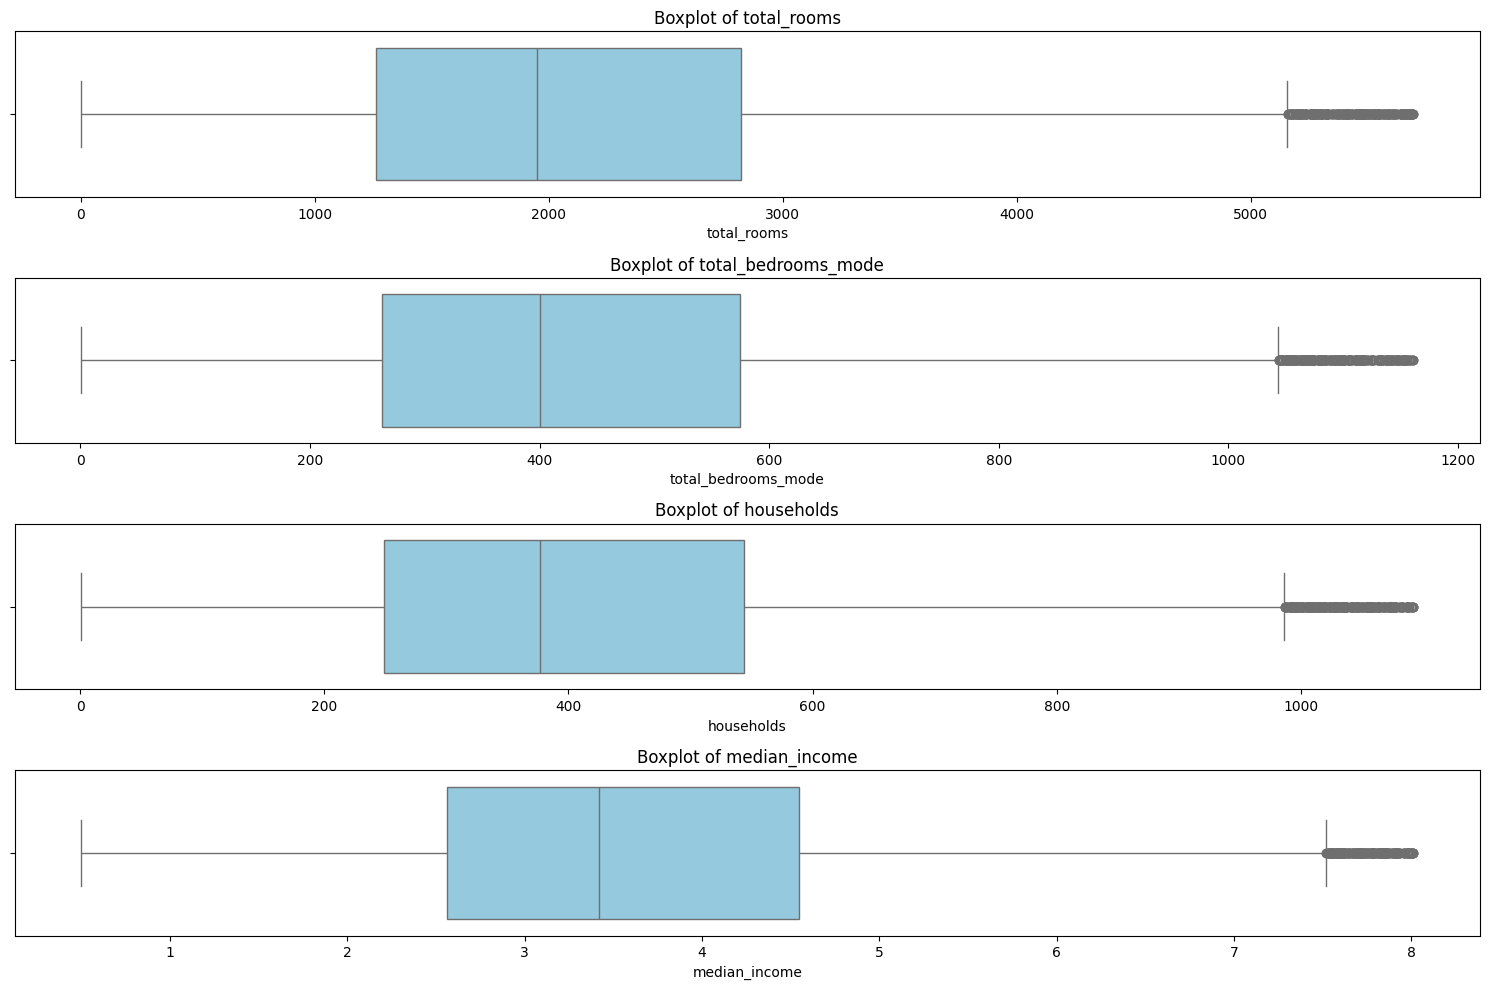

In [72]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(outliers, 1):
    plt.subplot(len(outliers), 1, i)  # Arrange subplots in a single column
    sns.boxplot(x=data_encoded[col], color='skyblue')
    plt.title(f'Boxplot of {col}')    
plt.tight_layout()  # Adjust layout to avoid overlapping
plt.show()

**4.) Standardising the numerical data** 

In [73]:
# Importing the StandardScaler module 
from sklearn.preprocessing import StandardScaler
numerical_columns = data_encoded.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
data_encoded[numerical_columns] = scaler.fit_transform(data_encoded[numerical_columns])
data_encoded.head()


,longitude,housing_median_age,total_rooms,households,median_income,median_house_value,total_bedrooms_mode,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-1.327835,0.982143,-0.984967,-1.202238,-0.515086,2.129631,-1.218463,False,False,True,False
1,-1.322844,-0.607019,-1.631588,-1.597298,-0.517899,1.314156,2.720269,False,False,True,False
2,-1.332827,1.856182,-0.507971,-0.983869,2.464539,1.258693,-0.972544,False,False,True,False
3,-1.337818,1.856182,-0.664803,-0.804035,1.364369,1.165100,-0.791129,False,False,True,False
4,-1.337818,1.856182,-0.377955,-0.632765,0.139753,1.172900,-0.609713,False,False,True,False


***Model Training***

**5.) Training the model** 

In [74]:
# Impprting the necessary modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import lr_module as lr

In [75]:
# Splitting the data
X = data_encoded.drop(columns='median_house_value')
y = data_encoded['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [76]:
# Fitting the model with my linear regression algorithm implementation and training it
lin_reg=lr.LinearRegression()
lin_reg.fit(X_train,y_train)
lin_reg.predict(X_test)

array([-1.188827779991989, -0.8569909647705606, 0.4180144175616712, ...,
       0.11502825240345638, -0.7335313376714409, 0.0517835766526539],
      dtype=object)

In [77]:
# fitting the model with sklearn linear regression implementation and training it
lin_reg_2=LinearRegression()
lin_reg_2.fit(X_train,y_train)
lin_reg_2.predict(X_test)

array([-1.19043396, -0.85796222,  0.41361549, ...,  0.12065412,
       -0.73431923,  0.05371526])

***Model Evaluation***

**6.) Evaluating the model** 

In [78]:
from sklearn.metrics import r2_score,mean_squared_error

Evaluation scores for model fitted my implementation of lr 

In [79]:
y_pred = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("The mean squared error is: ", mse)
r2 = r2_score(y_test, y_pred)
print("The R2 score is: ", r2)
rmse=np.sqrt(mse)
print("The RMSE is: ", rmse_2)

The mean squared error is:  0.5540303260783839
The R2 score is:  0.4370312938984803
The RMSE is:  0.7443321342508221


evaluation scores for model fitted with sklearn implementation of lr

In [80]:
y2_pred = lin_reg_2.predict(X_test)
mse_2 = mean_squared_error(y_test, y_pred)
print("The mean squared error is: ", mse)
r2_2 = r2_score(y_test, y_pred)
print("The R2 score is: ", r2)
rmse_2=np.sqrt(mse_2)
print("The RMSE is: ", rmse_2)

The mean squared error is:  0.5540303260783839
The R2 score is:  0.4370312938984803
The RMSE is:  0.7443321342508221


**7.) Comparing the evaluation metrics by using data visualisation** 

<Figure size 1000x600 with 0 Axes>

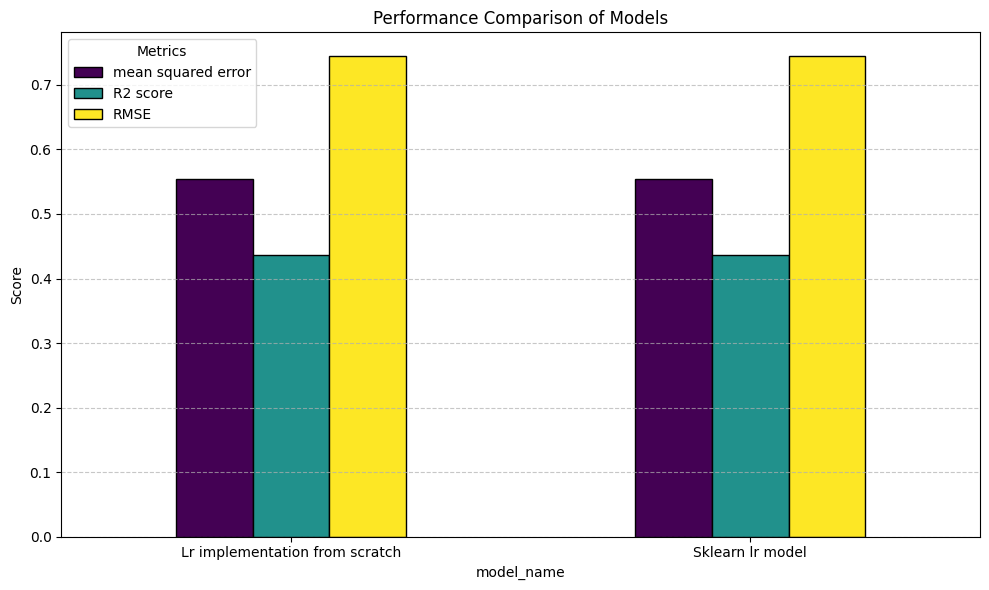

In [81]:
performance=[]
model_1={"model_name":"Lr implementation from scratch","mean squared error": mse,"R2 score": r2,"RMSE":rmse} 
model_2={"model_name":"Sklearn lr model","mean squared error": mse_2,"R2 score": r2_2,"RMSE":rmse_2} 
performance.append(model_1)
performance.append(model_2)
perf=pd.DataFrame(performance)

plt.figure(figsize=(10, 6))
perf.set_index("model_name").plot(kind="bar", figsize=(10, 6), cmap="viridis", edgecolor="black")
plt.title("Performance Comparison of Models")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.legend(title="Metrics")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


**8.) Building the polynomial regression model** 

In [82]:
# Importing the necessary modules
from sklearn.preprocessing import PolynomialFeatures

In [83]:
# Transforming the features into polynomial features
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)

# Splitting the transformed data
X_poly_train, X_poly_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Fitting the polynomial regression model
poly_reg = LinearRegression()
poly_reg.fit(X_poly_train, y_train)

# Predicting the target variable for the test set
y_poly_pred = poly_reg.predict(X_poly_test)

# Evaluating the polynomial regression model
mse_poly = mean_squared_error(y_test, y_poly_pred)
r2_poly = r2_score(y_test, y_poly_pred)
rmse_poly = np.sqrt(mse_poly)

print("The mean squared error for polynomial regression is: ", mse_poly)
print("The R2 score for polynomial regression is: ", r2_poly)
print("The RMSE for polynomial regression is: ", rmse_poly)

The mean squared error for polynomial regression is:  4.0127038327231795e+18
The R2 score for polynomial regression is:  -4.0774422957438817e+18
The RMSE for polynomial regression is:  2003173440.4996438


**8.) Comparing all the models** 

<Figure size 1000x600 with 0 Axes>

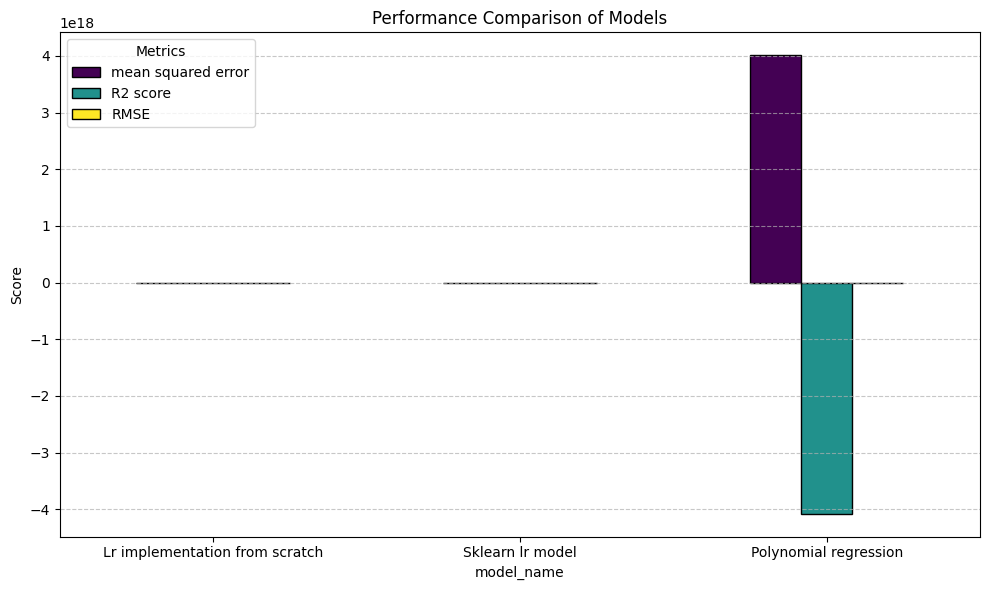

In [91]:
performance=[]
model_1={"model_name":"Lr implementation from scratch","mean squared error": mse,"R2 score": r2,"RMSE":rmse} 
model_2={"model_name":"Sklearn lr model","mean squared error": mse_2,"R2 score": r2_2,"RMSE":rmse_2}
model_3={"model_name":"Polynomial regression","mean squared error": mse_poly,"R2 score": r2_poly,"RMSE":rmse_poly}
performance.append(model_1)
performance.append(model_2)
performance.append(model_3)

perf=pd.DataFrame(performance)

plt.figure(figsize=(10, 6))
perf.set_index("model_name").plot(kind="bar", figsize=(10, 6), cmap="viridis", edgecolor="black")
plt.title("Performance Comparison of Models")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.legend(title="Metrics")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()
